**Análise e exploração dos Dados**

Durante essa fase a análise e exploração dos dados deve ser realizada, por meio das etapas de:

*   Preparar os dados
*   Analisar os atributos
*   Analisar as relações entre os atributos de forma bivariada e multivariada
*   Identificar possíveis casos atípicos
*   Avaliar a presença de dados ausentes
*   Avaliar suposições básicas

link da base de dados:

https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import preprocessing

In [24]:
# dados é um DataFrame
df_combustiveis = pd.read_csv("/content/PrecoCombustiveisGLP.csv",
           sep=";")

In [26]:
df_combustiveis.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,86.807.609/0001-92,RUA BRILHANTE,"2,787",NaN,VILA BANDEIRANTES,79006-560,GASOLINA,01/07/2004,"2,71","2,0888",R$ / litro,LIQUIGÁS
1,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,86.807.609/0001-92,RUA BRILHANTE,"2,787",NaN,VILA BANDEIRANTES,79006-560,ETANOL,01/07/2004,"1,71","1,1877",R$ / litro,LIQUIGÁS
2,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,86.807.609/0001-92,RUA BRILHANTE,"2,787",NaN,VILA BANDEIRANTES,79006-560,DIESEL,01/07/2004,"1,88","1,5279",R$ / litro,LIQUIGÁS
3,CO,MT,ALTA FLORESTA,AUTO POSTO BURIOL LTDA,04.481.758/0001-40,AVENIDA ARIOSTO DA RIVA,S/N,LOTE AC 35/2,CENTRO,78580-000,GASOLINA,01/07/2004,"2,69","2,0735",R$ / litro,CBPI
4,CO,MT,ALTA FLORESTA,AUTO POSTO BURIOL LTDA,04.481.758/0001-40,AVENIDA ARIOSTO DA RIVA,S/N,LOTE AC 35/2,CENTRO,78580-000,ETANOL,01/07/2004,"1,69",NaN,R$ / litro,CBPI


In [27]:
df_combustiveis.tail(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
915314,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,DIESEL,27/12/2004,"1,65",NaN,R$ / litro,PETROBAHIA
915315,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO 5 DE FEVEREIRO LTDA,02.125.226/0001-44,PRACA CORONEL ZEZINHO TANAJURA,1,COMODO,CENTRO,46140-000,ETANOL,27/12/2004,"1,89",NaN,R$ / litro,PETROBAHIA
915316,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO 5 DE FEVEREIRO LTDA,02.125.226/0001-44,PRACA CORONEL ZEZINHO TANAJURA,1,COMODO,CENTRO,46140-000,DIESEL,27/12/2004,"1,67",NaN,R$ / litro,PETROBAHIA


In [69]:
df_combustiveis.dtypes

,0
Regiao - Sigla,object
Estado - Sigla,object
Municipio,object
Revenda,object
CNPJ da Revenda,object
Nome da Rua,object
Numero Rua,object
Complemento,object
Bairro,object
Cep,object


In [25]:
# Outra forma de verificar o Dtype e a quantidade de Range, assim como dados das colunas
df_combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915317 entries, 0 to 915316
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Regiao - Sigla     915317 non-null  object
 1   Estado - Sigla     915317 non-null  object
 2   Municipio          915317 non-null  object
 3   Revenda            915317 non-null  object
 4   CNPJ da Revenda    915317 non-null  object
 5   Nome da Rua        915317 non-null  object
 6   Numero Rua         914840 non-null  object
 7   Complemento        299051 non-null  object
 8   Bairro             912676 non-null  object
 9   Cep                915317 non-null  object
 10  Produto            915317 non-null  object
 11  Data da Coleta     915317 non-null  object
 12  Valor de Venda     915317 non-null  object
 13  Valor de Compra    626609 non-null  object
 14  Unidade de Medida  915317 non-null  object
 15  Bandeira           915317 non-null  object
dtypes: object(16)
memory

In [28]:
df_combustiveis.isnull()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915312,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
915313,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
915314,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
915315,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [29]:
df_combustiveis.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
CNPJ da Revenda,0
Nome da Rua,0
Numero Rua,477
Complemento,616266
Bairro,2641
Cep,0


In [30]:
# porcentagem dos dados faltantes do Valor de Compra em relação ao total dos dados
# não estou calculando de outras colunas faltantes por não ser relevante para a análise
288708/915316

0.3154189372850469

<Axes: >

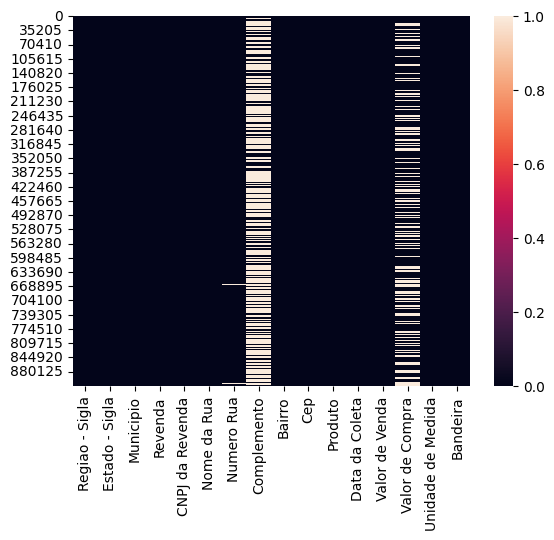

In [31]:
# Para verificar os valores ausentes por coluna de forma visual
sns.heatmap(df_combustiveis.isnull())

In [44]:
# Removendo colunas dados micros em que são repetidos, visto que já se tem os mesmo dados no macro como Região, Estado, Municipio
# Removi também CNPJ da Revenda porque já há o nome Revenda para análise
# axis = 1 porque estou removendo as colunas
df_combustiveis_2 = df_combustiveis.drop(['Nome da Rua','Numero Rua', 'Complemento', 'Bairro', 'Cep', 'CNPJ da Revenda'], axis = 1)

In [33]:
df_combustiveis_2.head(10)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,86.807.609/0001-92,GASOLINA,01/07/2004,"2,71","2,0888",R$ / litro,LIQUIGÁS
1,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,86.807.609/0001-92,ETANOL,01/07/2004,"1,71","1,1877",R$ / litro,LIQUIGÁS
2,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,86.807.609/0001-92,DIESEL,01/07/2004,"1,88","1,5279",R$ / litro,LIQUIGÁS
3,CO,MT,ALTA FLORESTA,AUTO POSTO BURIOL LTDA,04.481.758/0001-40,GASOLINA,01/07/2004,"2,69","2,0735",R$ / litro,CBPI
4,CO,MT,ALTA FLORESTA,AUTO POSTO BURIOL LTDA,04.481.758/0001-40,ETANOL,01/07/2004,"1,69",NaN,R$ / litro,CBPI
5,CO,MT,ALTA FLORESTA,AUTO POSTO BURIOL LTDA,04.481.758/0001-40,DIESEL,01/07/2004,"1,88","1,5146",R$ / litro,CBPI
6,CO,MT,ALTA FLORESTA,AUTO POSTO GONTIJO LTDA,36.947.737/0005-97,GASOLINA,01/07/2004,"2,66","1,9833",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
7,CO,MT,ALTA FLORESTA,AUTO POSTO GONTIJO LTDA,36.947.737/0005-97,ETANOL,01/07/2004,"1,68","1,0508",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
8,CO,MT,ALTA FLORESTA,AUTO POSTO GONTIJO LTDA,36.947.737/0005-97,DIESEL,01/07/2004,"1,85","1,4998",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
9,CO,MT,ALTA FLORESTA,VIDOTTO & MOLINA LTDA,32.985.244/0001-67,GASOLINA,01/07/2004,"2,7","2,05",R$ / litro,BRANCA


In [34]:
cat_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype == 'object']
cat_col

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'CNPJ da Revenda',
 'Produto',
 'Data da Coleta',
 'Valor de Venda',
 'Valor de Compra',
 'Unidade de Medida',
 'Bandeira']

In [35]:
# não apareceu nenhum dado porque todos os dados estão como object
num_col = [col for col in df_combustiveis_2.columns if df_combustiveis_2[col].dtype != 'object']
num_col

[]

In [63]:
df_combustiveis_2[cat_col].nunique()

KeyError: "['CNPJ da Revenda'] not in index"

In [64]:
df_combustiveis_2['Unidade de Medida'].unique()

array(['R$ / litro', 'R$ / m³'], dtype=object)

In [65]:
df_combustiveis_2['Produto'].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL', 'GNV'], dtype=object)

In [66]:
# para que a conversão ocorra com sucesso primeiro foi alterado ','  para '.', logo em seguir se transforma a string (Valor) para float
df_combustiveis_2['Valor de Venda'] = df_combustiveis_2['Valor de Venda'].str.replace(',', '.').astype(float)
df_combustiveis_2['Valor de Compra'] = df_combustiveis_2['Valor de Compra'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [52]:
df_combustiveis_2.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,GASOLINA,01/07/2004,2.71,2.0888,R$ / litro,LIQUIGÁS
1,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,ETANOL,01/07/2004,1.71,1.1877,R$ / litro,LIQUIGÁS
2,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,DIESEL,01/07/2004,1.88,1.5279,R$ / litro,LIQUIGÁS


In [67]:
# Verificando se mudou ',' para '.' e se o tipo está como float os valores
df_combustiveis_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915317 entries, 0 to 915316
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     915317 non-null  object 
 1   Estado - Sigla     915317 non-null  object 
 2   Municipio          915317 non-null  object 
 3   Revenda            915317 non-null  object 
 4   Produto            915317 non-null  object 
 5   Data da Coleta     915317 non-null  object 
 6   Valor de Venda     915317 non-null  float64
 7   Valor de Compra    915317 non-null  float64
 8   Unidade de Medida  915317 non-null  object 
 9   Bandeira           915317 non-null  object 
dtypes: float64(2), object(8)
memory usage: 69.8+ MB


In [68]:
mediana_por_produto = df_combustiveis_2.groupby('Produto')['Valor de Compra'].median()
mediana_por_produto

,Valor de Compra
Produto,
DIESEL,1.3450
ETANOL,1.0582
GASOLINA,1.8852
GNV,0.7670


In [57]:
df_combustiveis_2['Valor de Compra'] = df_combustiveis_2['Valor de Compra'].fillna(df_combustiveis_2['Produto'].map(mediana_por_produto ))

In [58]:
df_combustiveis_2.isnull().sum()

,0
Regiao - Sigla,0
Estado - Sigla,0
Municipio,0
Revenda,0
Produto,0
Data da Coleta,0
Valor de Venda,0
Valor de Compra,0
Unidade de Medida,0
Bandeira,0


In [74]:
df_combustiveis_2['Lucro'] = df_combustiveis_2['Valor de Venda'] - df_combustiveis_2['Valor de Compra']

In [78]:
df_combustiveis_2.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Lucro
0,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,GASOLINA,01/07/2004,2.71,2.0888,R$ / litro,LIQUIGÁS,0.6212
1,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,ETANOL,01/07/2004,1.71,1.1877,R$ / litro,LIQUIGÁS,0.5223
2,CO,MS,CAMPO GRANDE,AUTO POSTO APARECIDA DO NORTE LTDA,DIESEL,01/07/2004,1.88,1.5279,R$ / litro,LIQUIGÁS,0.3521


In [79]:
df_combustiveis_2.describe()

,Valor de Venda,Valor de Compra,Lucro
count,915317.000000,915317.000000,915317.000000
mean,1.696576,1.442411,0.254165
std,0.413851,0.378695,0.149765
min,0.690000,0.379200,-0.492500
25%,1.420000,1.094000,0.157100
50%,1.590000,1.345000,0.232000
75%,2.090000,1.863100,0.329800
max,3.100000,2.550700,1.425800


In [101]:
df_combustiveis_2.corr(method='pearson', numeric_only=True)

,Valor de Venda,Valor de Compra,Lucro
Valor de Venda,1.000000,0.932385,0.405708
Valor de Compra,0.932385,1.000000,0.047895
Lucro,0.405708,0.047895,1.000000


<Axes: >

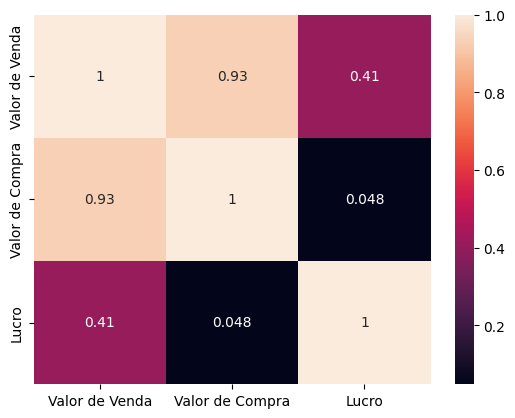

In [102]:
sns.heatmap(df_combustiveis_2.corr(method='pearson', numeric_only=True), annot=True)

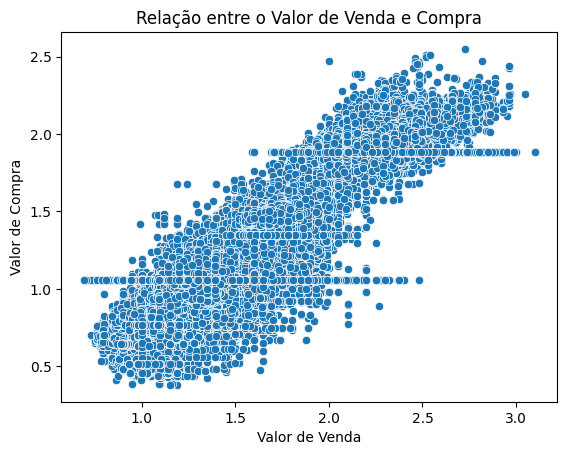

In [85]:
sns.scatterplot(data=df_combustiveis_2, x='Valor de Venda', y='Valor de Compra')
plt.title('Relação entre o Valor de Venda e Compra')
plt.show()

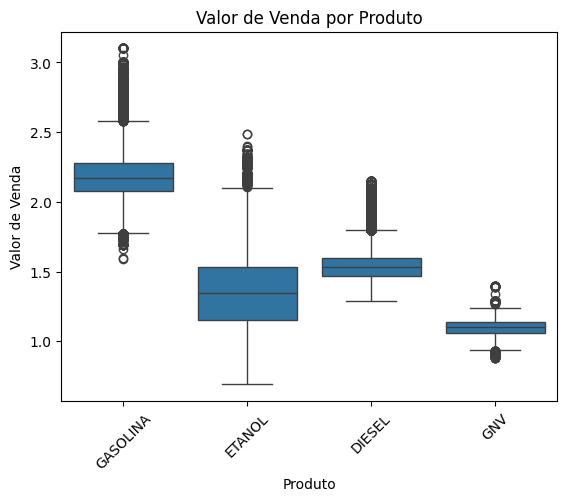

In [87]:
sns.boxplot(data=df_combustiveis_2, x='Produto', y='Valor de Venda')
plt.title('Valor de Venda por Produto')
plt.xticks(rotation=45)
plt.show()

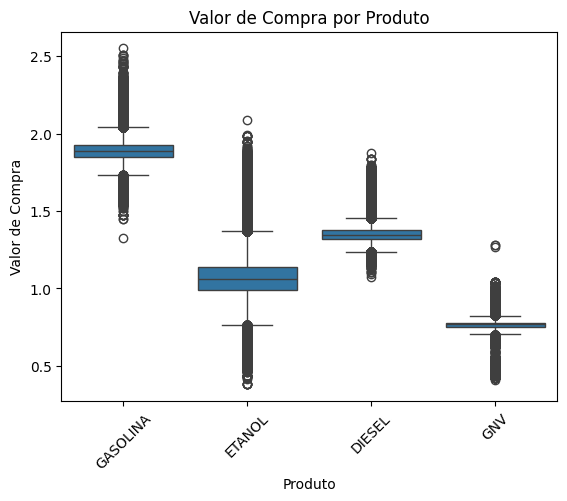

In [88]:
sns.boxplot(data=df_combustiveis_2, x='Produto', y='Valor de Compra')
plt.title('Valor de Compra por Produto')
plt.xticks(rotation=45)
plt.show()

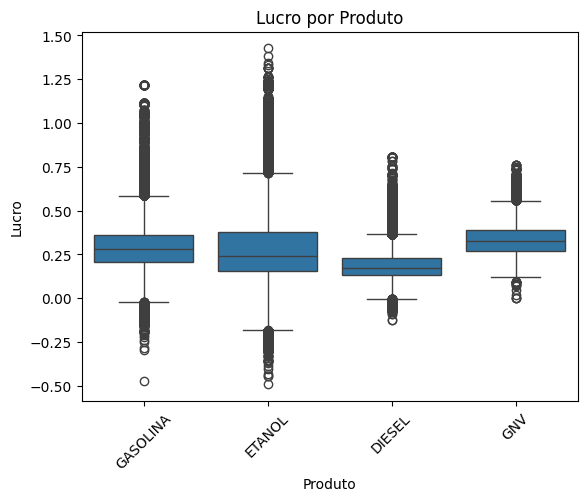

In [89]:
sns.boxplot(data=df_combustiveis_2, x='Produto', y='Lucro')
plt.title('Lucro por Produto')
plt.xticks(rotation=45)
plt.show()

<Axes: >

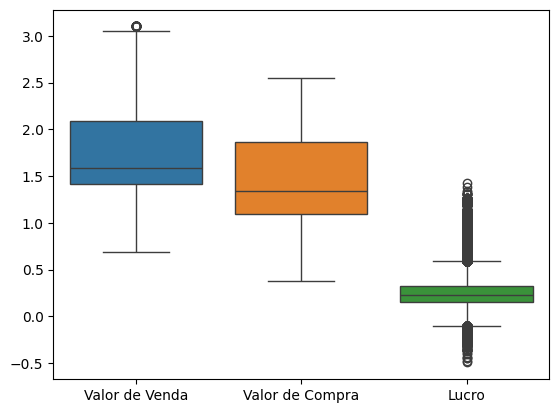

In [103]:
sns.boxplot(data=df_combustiveis_2)

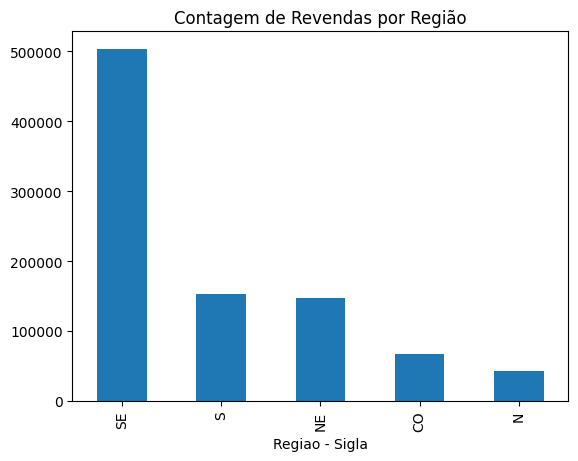

In [91]:
df_combustiveis_2['Regiao - Sigla'].value_counts().plot(kind='bar')
plt.title('Contagem de Revendas por Região')
plt.show()

<Axes: xlabel='Valor de Venda', ylabel='Valor de Compra'>

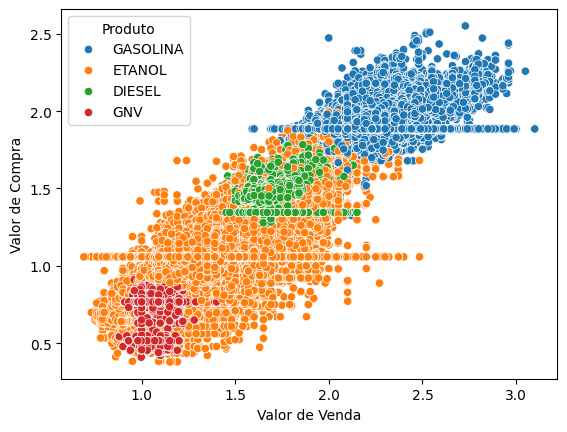

In [94]:
sns.scatterplot(x='Valor de Venda', y='Valor de Compra', data=df_combustiveis_2, hue='Produto')

<Axes: xlabel='Valor de Venda', ylabel='Valor de Compra'>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


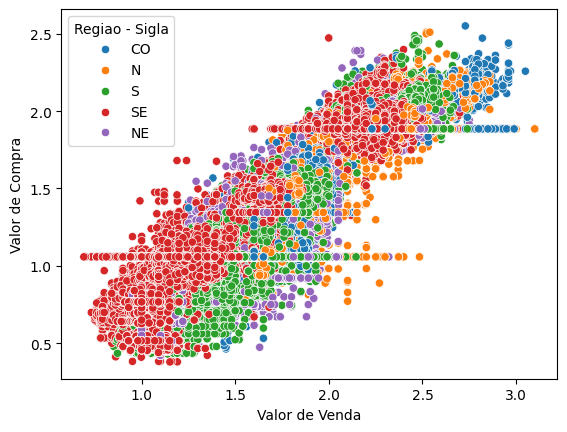

In [95]:
sns.scatterplot(x='Valor de Venda', y='Valor de Compra', data=df_combustiveis_2, hue='Regiao - Sigla')

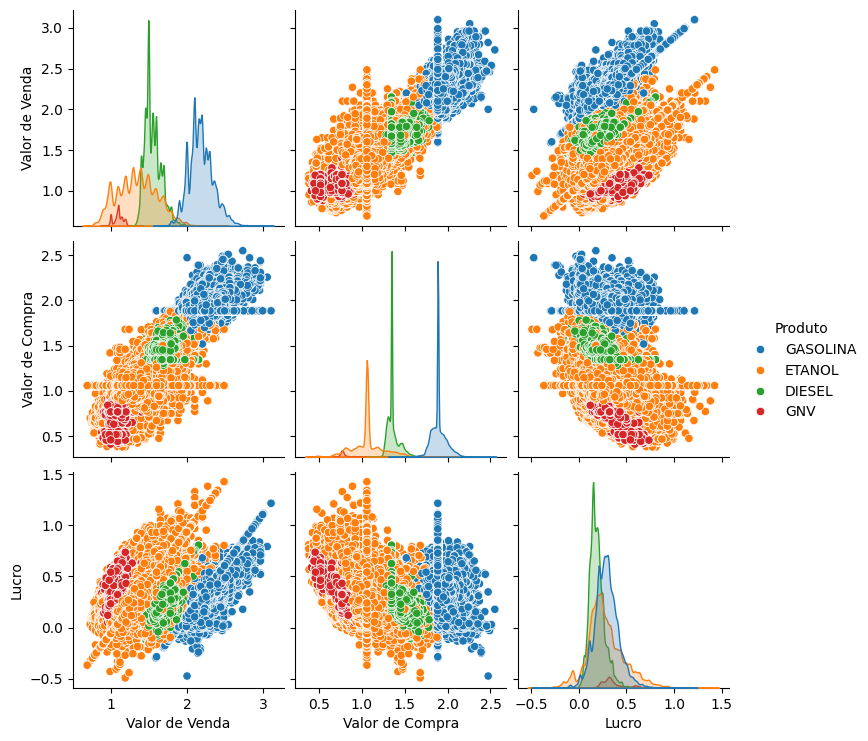

In [96]:
sns.pairplot(df_combustiveis_2, hue='Produto')